<a href="https://colab.research.google.com/github/fahammed2022/Classification-and-Regression/blob/main/Optimization%20of%20Supply%20Chain%20Routes/Optimization_of_Supply_Chain_Routes_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Optimization of Supply Chain Routes using Machine Learning and Deep Learning Algorithm

In [8]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load and prepare the data

In [9]:
# Read the dataset
dataset_path = "/content/Transportation_data_updated.csv"
Dataset = pd.read_csv(dataset_path)

# Display first 5 rows of the dataset
print(Dataset.head())

   Distance TransportationMode WeatherConditions TrafficConditions  \
0     152.0               Ship             Rainy               Low   
1     485.0                Air             Snowy            Medium   
2     398.0              Truck             Snowy              High   
3     320.0              Truck             Snowy            Medium   
4     156.0              Truck             Snowy            Medium   

   FuelPrices  DeliveryTime TransportationCompany  TransportationCost  
0    3.339509          22.0             Company C               228.0  
1    2.804746          23.0             Company B              2425.0  
2    2.596014           3.0             Company A               796.0  
3    3.250956          16.0             Company B               640.0  
4    2.309715          15.0             Company C               312.0  


## Data Preprocessing

In [10]:
# Check for missing values
print(Dataset.isnull().sum())

Distance                 3
TransportationMode       0
WeatherConditions        0
TrafficConditions        0
FuelPrices               1
DeliveryTime             1
TransportationCompany    0
TransportationCost       2
dtype: int64


In [13]:
# Handle missing values (Replacing the missing value with the average or mean value)
Misisng_value_columns = ['Distance', 'FuelPrices', 'DeliveryTime']
for column in Misisng_value_columns:
    Dataset[column].fillna(Dataset[column].mean(), inplace=True)

## Visualize the distribution of transportation costs

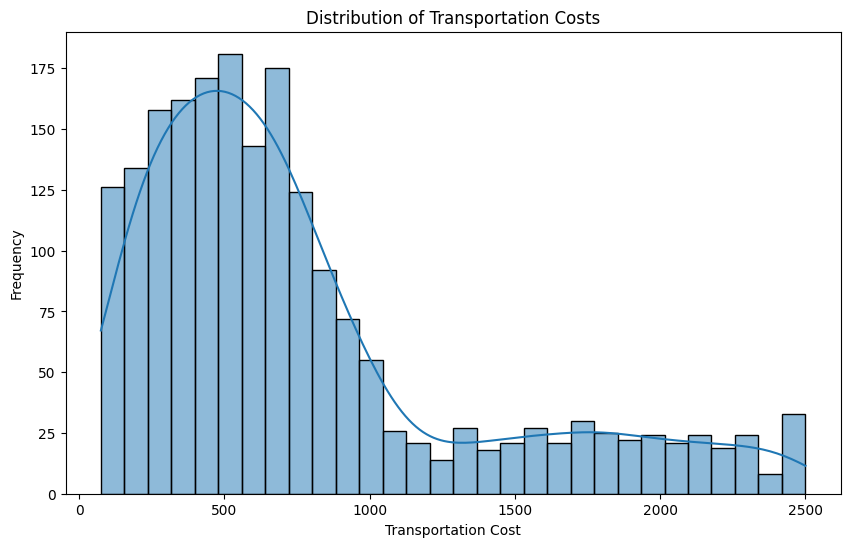

In [19]:
# Distribution of Transportation Costs
plt.figure(figsize=(10, 6))
sns.histplot(Dataset['TransportationCost'], bins=30, kde=True)
plt.title('Distribution of Transportation Costs')
plt.xlabel('Transportation Cost')
plt.ylabel('Frequency')
plt.show()

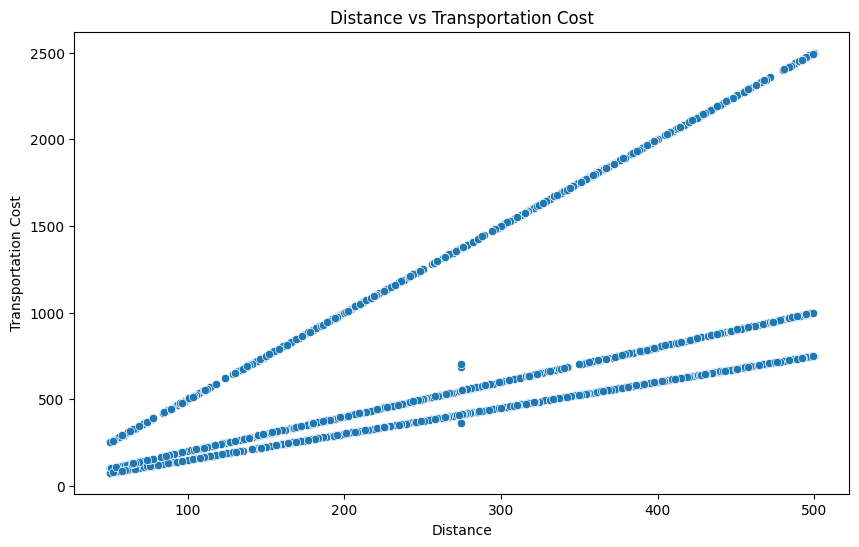

In [16]:
# Relationship between Distance and Transportation Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='TransportationCost', data=Dataset)
plt.title('Distance vs Transportation Cost')
plt.xlabel('Distance')
plt.ylabel('Transportation Cost')
plt.show()

In [20]:
# Features and Target Variable
Target = Dataset['TransportationCost']  # Target Column
Features = Dataset.drop(['TransportationCost'], axis=1)  # Features Column